## Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de la computacion
## Carrera: Ingenieria en Computacion Inteligente
## Curso: Machine y Deep Learning
## Maestro: Dr. Francisco Javier Luna Rosas
## Alumno: Guillermo González Lara (237864)
## Semestre: Enero_Junio del 2026

## Práctica 13: Aprendizaje No Supervisado

### Introducción

El Clustering Jerárquico es una técnica de aprendizaje no supervisado que busca agrupar elementos similares en "conglomerados" o clusters. A diferencia de otros métodos, este algoritmo crea una estructura de árbol llamada **Dendrograma**, que nos permite visualizar las relaciones de similitud entre todos los individuos del conjunto de datos.

En esta práctica, utilizaremos el dataset `EjemploEstudiantes.csv` para agrupar a los estudiantes basándonos en sus calificaciones. El objetivo es identificar qué alumnos tienen un rendimiento académico similar y visualizar estas agrupaciones gráficamente.

### Paso 1: Carga de Datos y Estandarización

Cargamos los datos y, dado que PCA es sensible a la escala de las variables, aplicamos `StandardScaler` para normalizar las calificaciones (media 0, desviación estándar 1).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el dataset (manejando correctamente separadores y decimales)
try:
    df = pd.read_csv('../EjemploEstudiantes.csv', sep=';', decimal=',')
except FileNotFoundError:
    df = pd.read_csv('EjemploEstudiantes.csv', sep=';', decimal=',')

# Establecemos los nombres como índice para usarlos en la gráfica
df.set_index(df.columns[0], inplace=True)

print("Datos originales:")
print(df.head())

# Estandarización de los datos (Paso crítico para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

Datos originales:
            Matematicas  Ciencias  Espanol  Historia  EdFisica
Unnamed: 0                                                    
Lucia               7.0       6.5      9.2       8.6       8.0
Pedro               7.5       9.4      7.3       7.0       7.0
Ines                7.6       9.2      8.0       8.0       7.5
Luis                5.0       6.5      6.5       7.0       9.0
Andres              6.0       6.0      7.8       8.9       7.3


### Paso 2: Aplicación de PCA

Utilizamos `PCA` de Scikit-Learn para reducir la dimensionalidad a 2 componentes principales, lo que nos permitirá graficar los datos en un plano XY.

In [ ]:
# Instanciamos PCA para obtener 2 componentes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

# Creamos un DataFrame con los resultados
pca_df = pd.DataFrame(data=principalComponents, 
                      columns=['PC1', 'PC2'], 
                      index=df.index)

# Varianza explicada por cada componente
varianza = pca.explained_variance_ratio_
print(f"Varianza explicada - PC1: {varianza[0]:.2f}, PC2: {varianza[1]:.2f}")
print(f"Varianza total acumulada: {sum(varianza):.2f}")
print("\nCoordenadas de los estudiantes en PC1 y PC2:")
print(pca_df.head())

Varianza explicada - PC1: 0.58, PC2: 0.33
Varianza total acumulada: 0.90

Coordenadas de los estudiantes en PC1 y PC2:
                 PC1       PC2
Unnamed: 0                    
Lucia      -0.323063  1.772525
Pedro      -0.665441 -1.638702
Ines       -1.002547 -0.515692
Luis        3.172095 -0.262782
Andres      0.488868  1.365402


### Paso 3: Visualización (Biplot)

Generamos un **Biplot**, que superpone dos gráficos:
1.  **Mapa de Individuos (Puntos):** Muestra la posición de cada estudiante. Los alumnos cercanos tienen perfiles académicos similares.
2.  **Círculo de Correlaciones (Flechas):** Muestra el peso de cada materia (feature) en los componentes. Flechas cercanas indican materias correlacionadas.

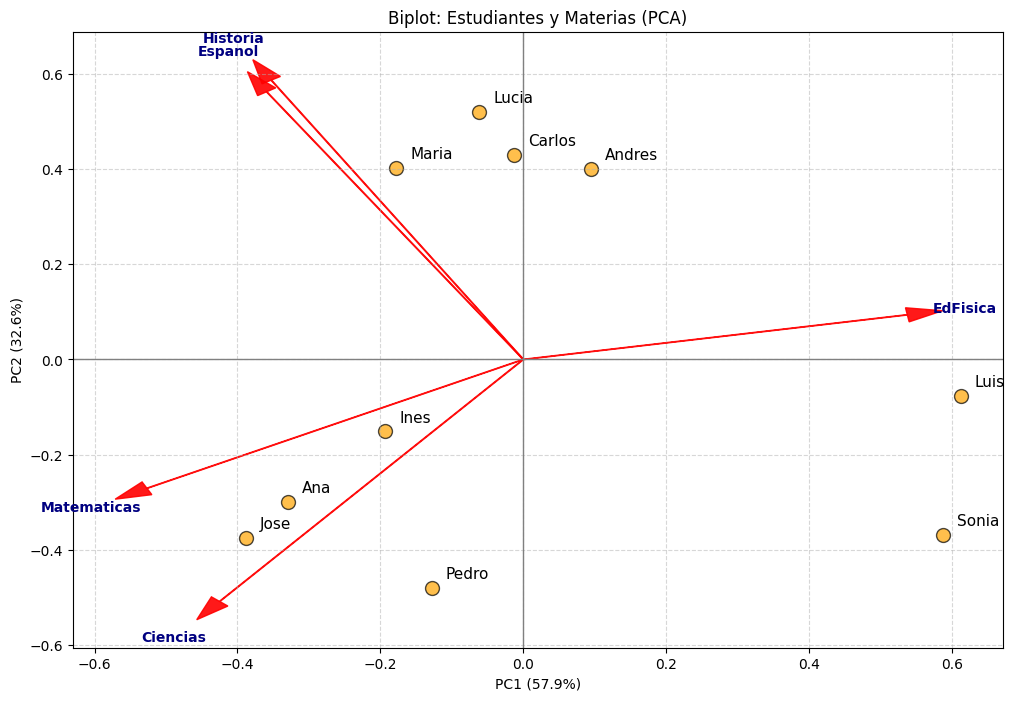

In [ ]:
# Función para crear el Biplot (similar al de R)
def my_biplot(score, coeff, labels=None, features=None):
    plt.figure(figsize=(12, 8))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    
    # Escalado para que las flechas se vean bien junto con los puntos
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    # 1. Graficar estudiantes (Scatter Plot)
    plt.scatter(xs * scalex, ys * scaley, c='orange', s=100, edgecolors='k', alpha=0.7)
    
    # Etiquetas de los estudiantes
    for i, label in enumerate(labels):
        plt.text(xs[i] * scalex + 0.02, ys[i] * scaley + 0.02, label, color='black', fontsize=11)
        
    # 2. Graficar vectores de las materias (Flechas)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.9, 
                  head_width=0.03, head_length=0.05)
        if features is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, features[i], color='navy', fontweight='bold', ha='center', va='center')
            
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    plt.title("Biplot: Estudiantes y Materias (PCA)")
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Dibujar líneas centrales
    plt.axhline(0, color='grey', linewidth=1)
    plt.axvline(0, color='grey', linewidth=1)
    
    plt.show()

# Llamamos a la función
# pca.components_.T son los "loadings" o vectores propios
my_biplot(principalComponents, np.transpose(pca.components_), labels=df.index, features=df.columns)

## Interpretación de Resultados (Biplot)

##### Explicación generada por Gemini
El gráfico generado nos permite extraer las siguientes conclusiones sobre los datos:

**1. Análisis de Vectores (Asignaturas):**
* **Longitud del vector:** Indica qué tan bien está representada la variable en el gráfico. Vectores más largos tienen mayor importancia.
* **Ángulo entre vectores:** Indica la correlación entre asignaturas:
    * **Ángulo Agudo (< 90°):** Correlación positiva. Por ejemplo, observamos que **Matemáticas** y **Ciencias** apuntan en direcciones similares, indicando que los alumnos buenos en una suelen ser buenos en la otra. Lo mismo ocurre con **Español** e **Historia**.
    * **Ángulo Recto (~90°):** Variables no correlacionadas.
    * **Ángulo Obtuso (> 90°) u Opuesto:** Correlación negativa.

**2. Análisis de Puntos (Estudiantes):**
* **Proximidad:** Los estudiantes que aparecen cerca uno del otro en el gráfico tienen perfiles académicos similares.
* **Dirección:** La posición de un estudiante respecto a los vectores indica sus fortalezas.
    * Los estudiantes situados en la dirección de las flechas de **Ciencias/Matemáticas** tienen calificaciones altas en esas áreas.
    * Los estudiantes situados en la dirección de **Historia/Español** destacan en humanidades.
    * El vector de **EdFisica** (Educación Física) suele mostrar un comportamiento distinto, posiblemente ortogonal o menos correlacionado con el bloque académico tradicional.


##### La explicación del profe:

Cluster1 (Luis y Sonia), se ve fuertemente impactado de manera positiva por las notas de educación física, es decir son buenos deportistas.

Cluster2 (Ana, Inés, José y Pedro) parece ser lo opuesto al cluster 1. Sus integrantes se destacan en ciencias y matemáticas, sin embargo son malos en deportes.

Cluster3 (Andrés, Carlos, Lucía y María). Se caracteriza por agrupar a los estudiantes destacados en el área de español e historia. Se puede inferir también que si bien no son excelentes en deportes, al menos no son los peores, pues se encuentran en la mitad del eje X.

## Conclusiones

PCA significa Análisis de Componentes Principales (Principal Component Analysis, en inglés). Es una técnica estadística muy utilizada en ciencia de datos, aprendizaje automático y análisis de datos para reducir la dimensionalidad de un conjunto de datos, manteniendo la mayor cantidad posible de información.

En esta práctica implementaremos Análisis de Componentes Principales (Principal Component Analysis, en inglés) para realizar tres clusters de notas escolares.


## Referencias

* Scikit-learn: Machine Learning in Python. (2026). Receiver Operating Characteristic (ROC). URL: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
* Youden, W. J. (1950). "Index for rating diagnostic tests". Cancer.
* Dr. Francisco Javier Luna Rosas. Material del curso Machine y Deep Learning.